# Temporal Data Analysis - Projet

Elyes KHALFALLAH - 5230635

23 / 12 / 2024

---


In [1]:
# Imports utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1) Analyse préliminaire des données


### 1.1) Chargement des données


In [2]:
# Chargement des données
data = pd.read_csv("sunspot.csv")


In [3]:
# Aperçu des premières lignes
print("Aperçu des premières lignes :")
data.head()


Aperçu des premières lignes :


,t,sunspot
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0


In [4]:
# Informations générales sur le DataFrame
print("\nInformations sur le DataFrame :")
data.info()



Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   t        289 non-null    int64  
 1   sunspot  286 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.6 KB


In [5]:
# Statistiques descriptives sur la colonne sunspot
print("\nStatistiques descriptives sur la colonne 'sunspot' :")
data["sunspot"].describe()



Statistiques descriptives sur la colonne 'sunspot' :


count    286.000000
mean      47.801748
std       40.046048
min        1.000000
25%       13.900000
50%       37.700000
75%       68.700000
max      190.200000
Name: sunspot, dtype: float64

In [6]:
# Vérifier s'il y a des valeurs manquantes
print("\nNombre de valeurs manquantes par colonne :")
data.isnull().sum()



Nombre de valeurs manquantes par colonne :


t          0
sunspot    3
dtype: int64

In [7]:
# Afficher les valeurs 11, 12, et 110 du dataset
print("\nValeurs 11, 12, et 110 du dataset :")
data.iloc[[11, 12, 110]]



Valeurs 11, 12, et 110 du dataset :


,t,sunspot
11,1711,NaN
12,1712,NaN
110,1810,NaN


In [8]:
# Avant de visualiser, faisons en sorte que la colonne 't' soit considérée comme une information temporelle
# 't' représente ici l'année. Nous allons donc la transformer en datetime pour un meilleur handling temporel.
# On considère le 1er janvier de l'année 't'.
data["t"] = pd.to_datetime(data["t"], format="%Y")

# Définir la colonne 't' comme index pour une meilleure manipulation des séries temporelles
data.set_index("t", inplace=True)


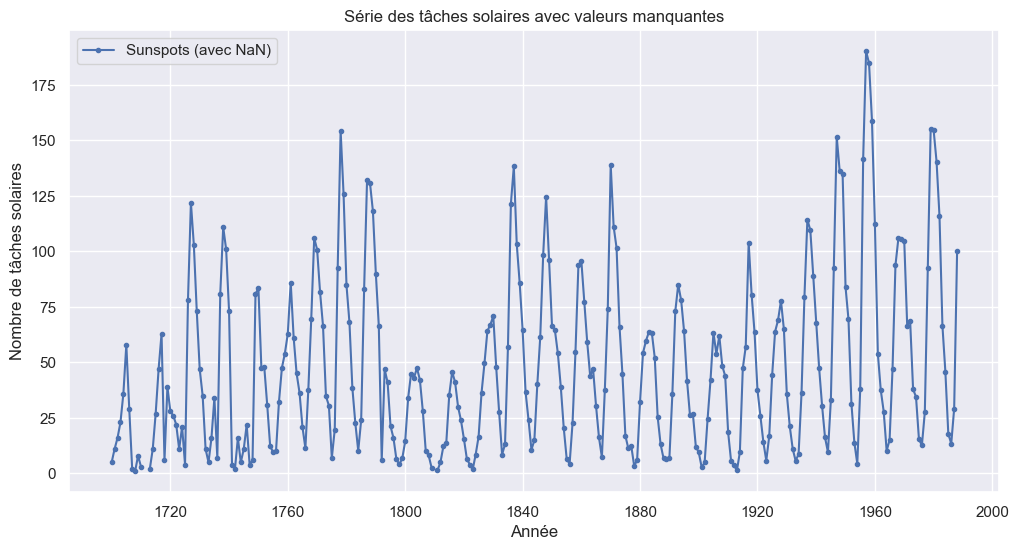

In [9]:
# Visualisation brute (avec valeurs manquantes)
sns.set()
plt.figure(figsize=(12, 6))
plt.plot(data["sunspot"], marker=".", linestyle="-", label="Sunspots (avec NaN)")
plt.title("Série des tâches solaires avec valeurs manquantes")
plt.xlabel("Année")
plt.ylabel("Nombre de tâches solaires")
plt.legend()
plt.show()


### 1.2) Interpolation linéaire pour completer les données manquantes


In [10]:
# Interpolation linéaire
data_interpolated = data.copy()

# Interpolation linéaire des valeurs manquantes arrondies au dixième
# comme toutes les autres valeurs du dataset
data_interpolated["sunspot"] = round(
    data_interpolated["sunspot"].interpolate(method="linear"), 1
)


In [11]:
# Vérifier s'il y a des valeurs manquantes
print("\nDonnées NaN manquantes après interpolation :")
print(data_interpolated.isnull().sum())

# Afficher les valeurs 11, 12, et 110 du dataset
print("\nValeurs 11, 12, et 110 du dataset :")
data_interpolated.iloc[[11, 12, 110]]



Données NaN manquantes après interpolation :
sunspot    0
dtype: int64

Valeurs 11, 12, et 110 du dataset :


,sunspot
t,
1711-01-01,2.7
1712-01-01,2.3
1810-01-01,2.0


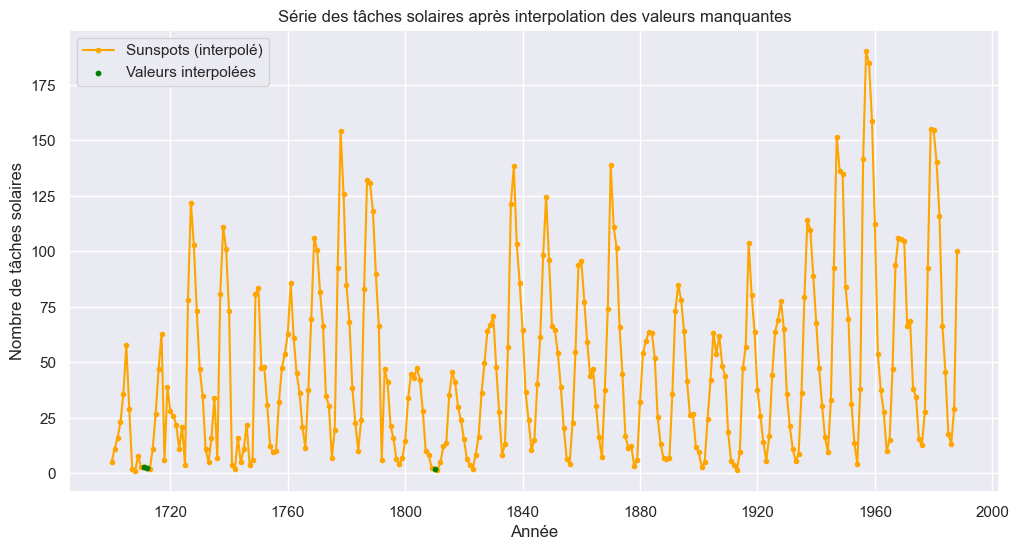

In [12]:
# Les années manquantes initialement
missing_years = [1711, 1712, 1810]
missing_years_dt = pd.to_datetime(missing_years, format="%Y")

# Visualisation après interpolation
sns.set()
plt.figure(figsize=(12, 6))

# On affiche la série temporelle avec les valeurs interpolées
plt.plot(
    data_interpolated["sunspot"],
    marker=".",
    linestyle="-",
    color="orange",
    label="Sunspots (interpolé)",
)

# On met en évidence les valeurs interpolées aux années manquantes en rouge
plt.scatter(
    missing_years_dt,
    data_interpolated.loc[missing_years_dt, "sunspot"],
    color="Green",
    s=10,
    zorder=5, 
    label="Valeurs interpolées",
)

plt.title("Série des tâches solaires après interpolation des valeurs manquantes")
plt.xlabel("Année")
plt.ylabel("Nombre de tâches solaires")
plt.legend()
plt.show()
